In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import cm
#import jupyterthemes as jt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Gather data

In [2]:
boston_dataset=load_boston()

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.data.shape)

(506, 13)


In [5]:
#prices in thousands
boston_dataset.target
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
data['PRICE']=boston_dataset.target

In [7]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [8]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [9]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [10]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black',color='#2196F3')
plt.xlabel("Price in thousands",fontsize=14)
plt.ylabel("Number of houses",fontsize=14)

Text(0, 0.5, 'Number of houses')

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data["PRICE"],bins=50,hist=True,kde=False,color='red')    

In [14]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],bins=50,ec='black',color='green')
plt.xlabel("Average no of Houses",fontsize=14)
plt.ylabel("Number of houses",fontsize=14)

Text(0, 0.5, 'Number of houses')

In [15]:
plt.hist(data["RAD"],bins=24,ec='black',color='#7B1FA2',rwidth=0.5)

(array([ 20.,  24.,  38., 110., 115.,  26.,  17.,  24.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 132.]),
 array([ 1.        ,  1.95833333,  2.91666667,  3.875     ,  4.83333333,
         5.79166667,  6.75      ,  7.70833333,  8.66666667,  9.625     ,
        10.58333333, 11.54166667, 12.5       , 13.45833333, 14.41666667,
        15.375     , 16.33333333, 17.29166667, 18.25      , 19.20833333,
        20.16666667, 21.125     , 22.08333333, 23.04166667, 24.        ]),
 <a list of 24 Patch objects>)

In [16]:
frequency=data["RAD"]
frequency.axes[0]

RangeIndex(start=0, stop=506, step=1)

Text(0, 0.5, 'frequency')

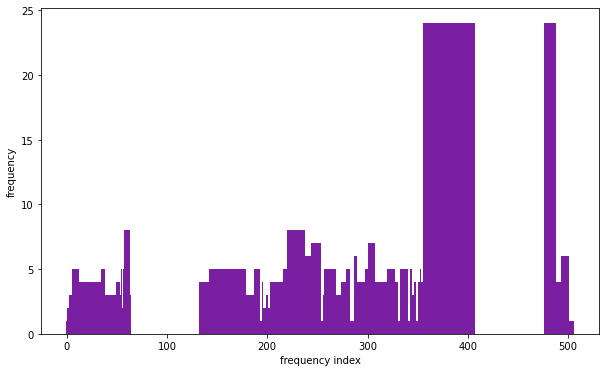

In [17]:
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency,color='#7B1FA2')
plt.xlabel("frequency index")
plt.ylabel("frequency")

In [18]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [19]:
data.min()
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [20]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [21]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [22]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [23]:
data["PRICE"].corr(data["RM"])

0.695359947071539

In [24]:
data["PRICE"].corr(data["PTRATIO"])

-0.5077866855375615

In [25]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [26]:
mask=np.zeros_like(data.corr())

In [27]:
mask
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text major ticklabel objects>)

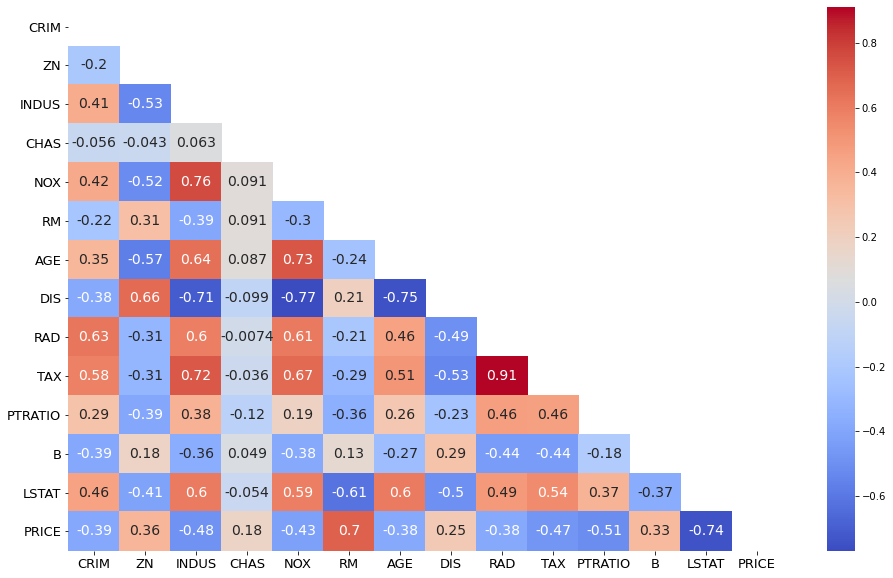

In [28]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14},cmap=cm.coolwarm)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Text(0, 0.5, 'NOX')

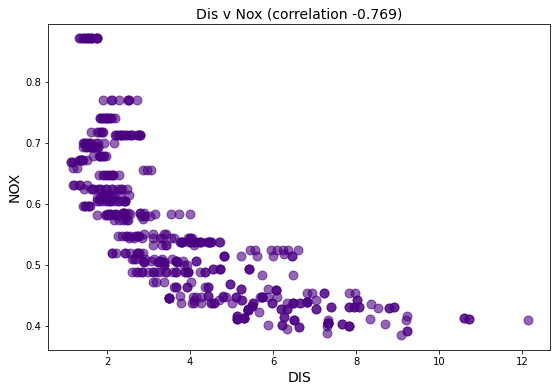

In [29]:
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=[9,6])
plt.title(f"Dis v Nox (correlation {nox_dis_corr})",fontsize=14)
plt.scatter(data['DIS'],data['NOX'],alpha=0.6,s=80,color='indigo')
plt.xlabel('DIS',fontsize=14)
plt.ylabel('NOX',fontsize=14)


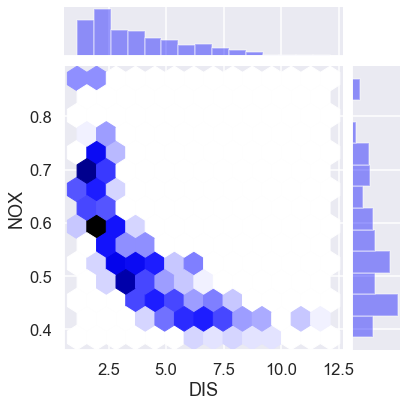

In [30]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(data['DIS'],data['NOX'],color='blue',kind='hex')


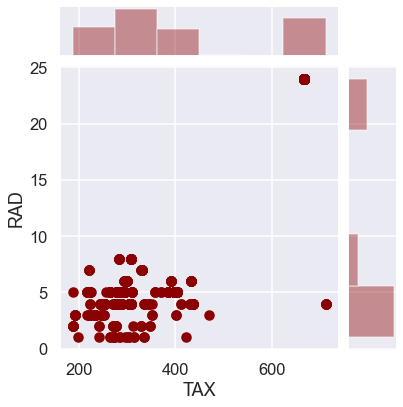

In [31]:
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')
sns.jointplot(data['TAX'],data['RAD'],color='darkred')

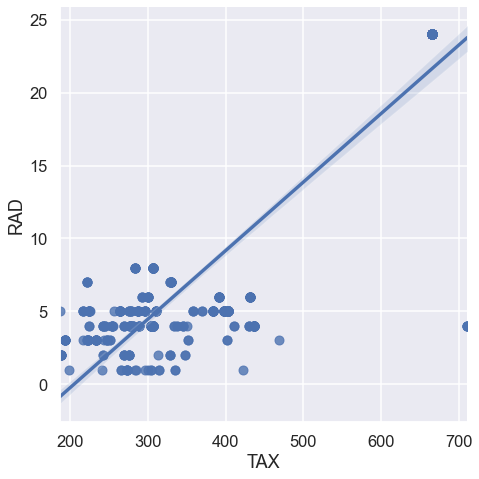

In [32]:
sns.lmplot(x="TAX",y="RAD",data=data,height=7)

Text(0, 0.5, 'PRICE')

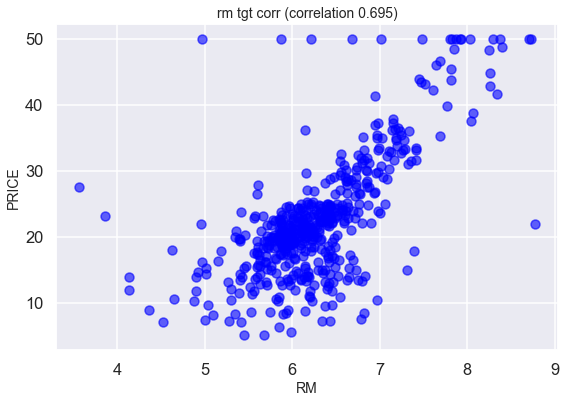

In [33]:
rm_tgt_corr=round(data['RM'].corr(data['PRICE']),3)
plt.figure(figsize=[9,6])
plt.title(f"rm tgt corr (correlation {rm_tgt_corr})",fontsize=14)
plt.scatter(data['RM'],data['PRICE'],alpha=0.6,s=80,color='blue')
plt.xlabel('RM',fontsize=14)
plt.ylabel('PRICE',fontsize=14)


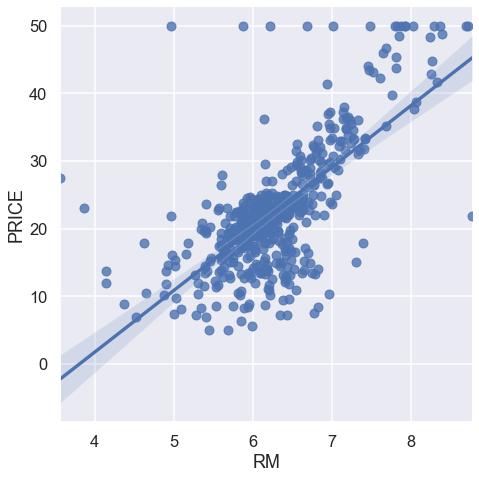

In [34]:
sns.lmplot(x='RM',y="PRICE",data=data,height=7)

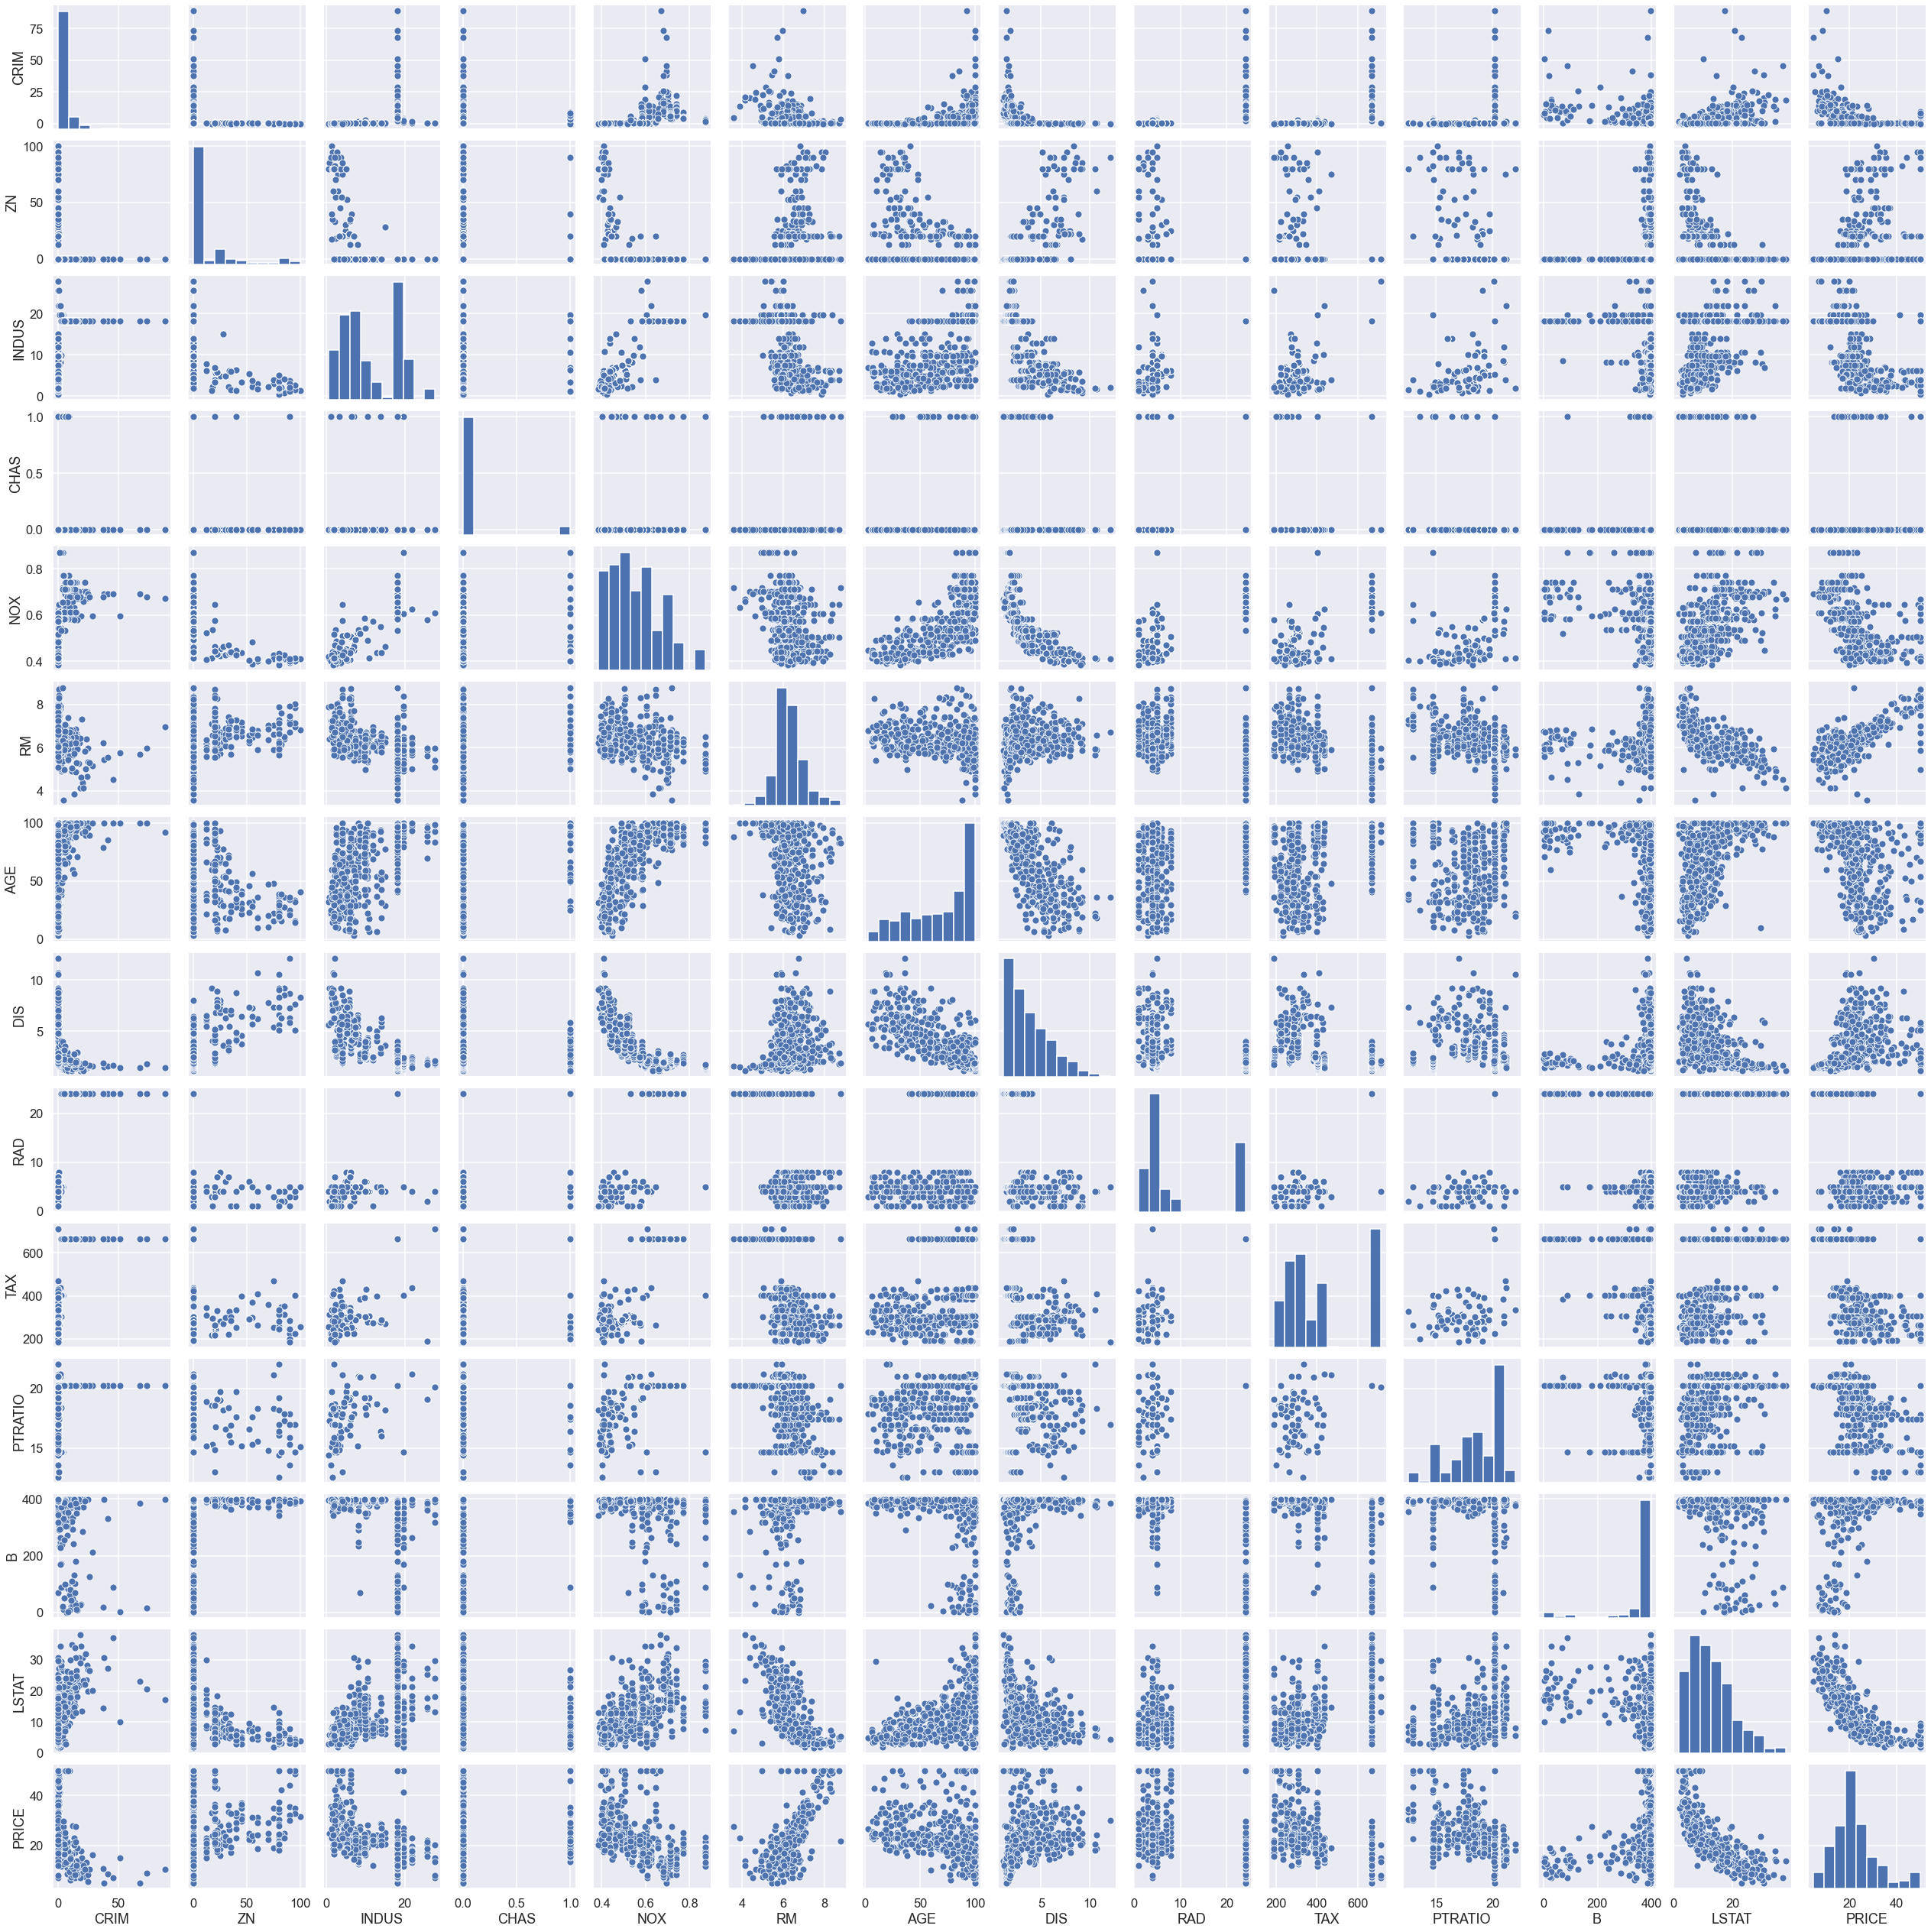

CPU times: user 32.5 s, sys: 91.8 ms, total: 32.5 s
Wall time: 32.6 s


In [35]:
%%time
sns.pairplot(data)
plt.show()

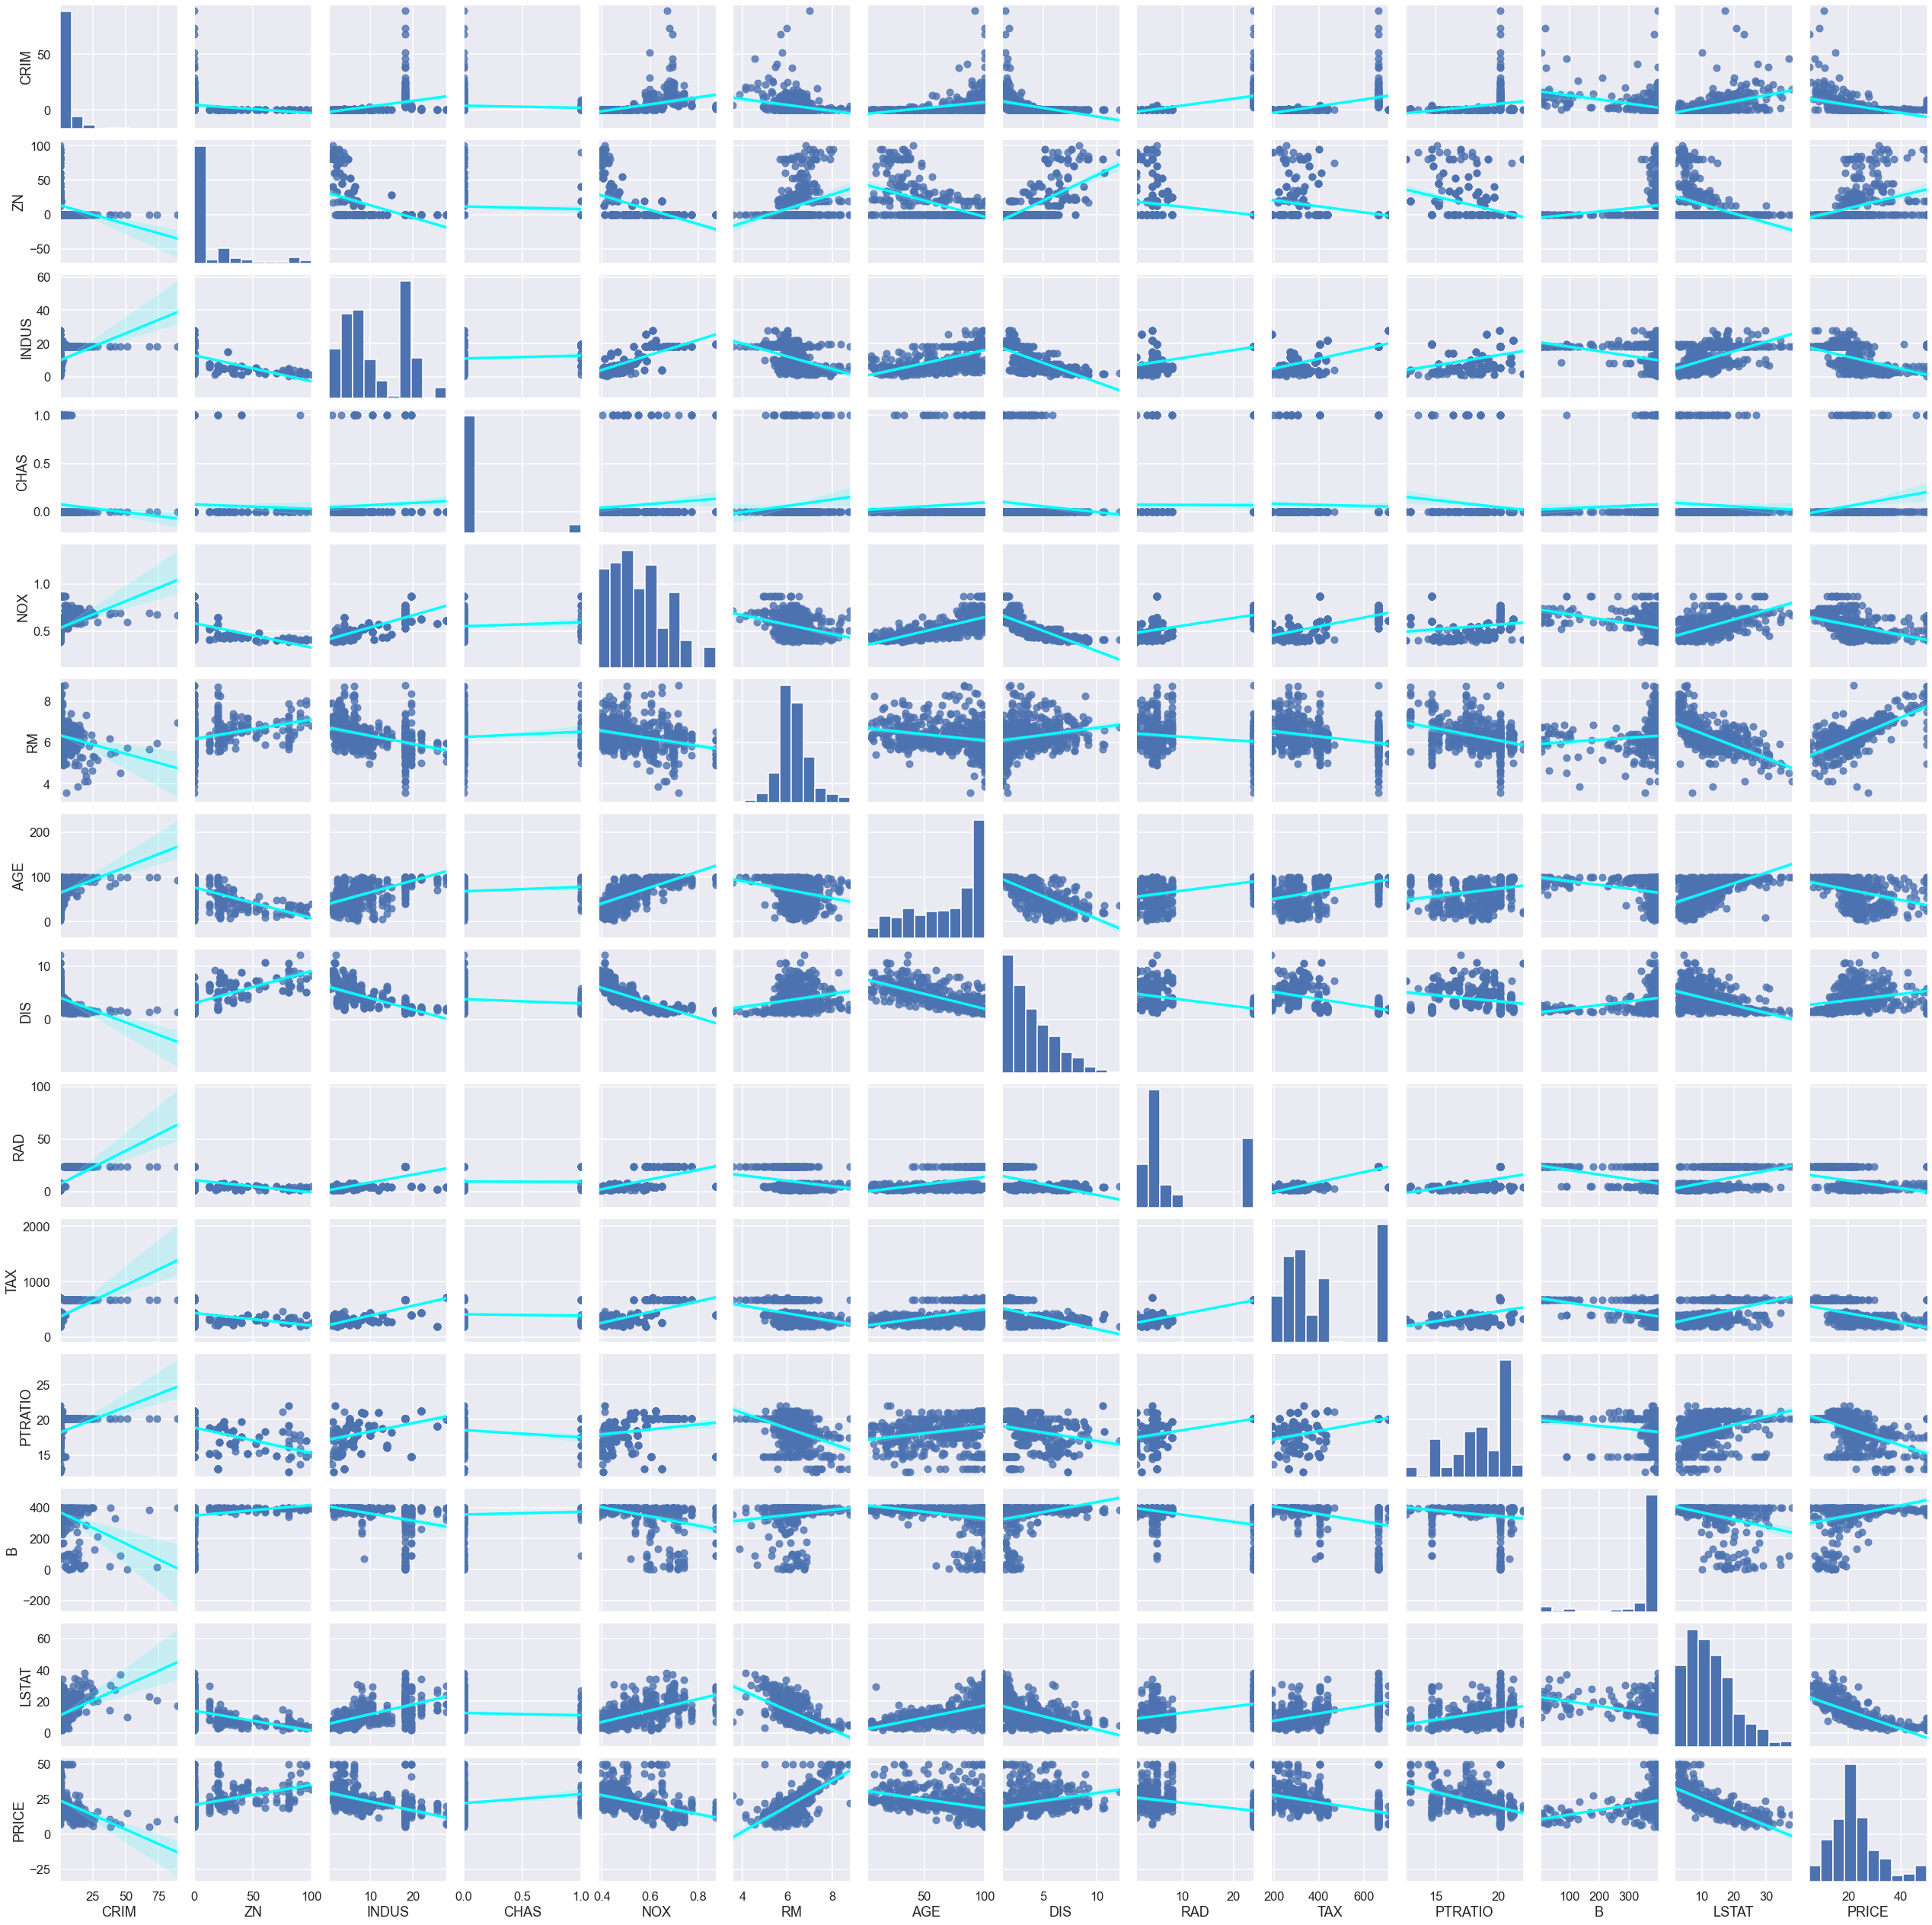

CPU times: user 3min 1s, sys: 601 ms, total: 3min 1s
Wall time: 48.5 s


In [36]:
%%time
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

In [42]:
prices=np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=.2,random_state=10)



In [43]:
regr=LinearRegression()


In [44]:
regr.fit(X_train,y_train)
print("Intercept " ,regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Intercept  4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [45]:
print("X train rsq",regr.score(X_train,y_train))
print("X test rsq",regr.score(X_test,y_test))

X train rsq 0.7930234826697583
X test rsq 0.7446922306260724


In [46]:
data['PRICE'].skew()

1.1080984082549072